In [9]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)


In [13]:
db_path = "papcorns.sqlite"
conn = sqlite3.connect(db_path)
users_df = pd.read_sql_query("SELECT * FROM users;", conn)
events_df = pd.read_sql_query("SELECT * FROM user_events;", conn)

In [14]:
def draw_pie_chart(x, y, startangle, title):
    plt.figure(figsize=(8, 8))
    plt.pie(
        x,
        labels=y,
        autopct="%1.1f%%",
        startangle=startangle,
        wedgeprops={"edgecolor": "black"})
    plt.title(title)
    plt.show()


def draw_bar_plot(x, y, title, xlabel, ylabel):
    sorted_indices = sorted(range(len(y)), key=lambda k: y[k], reverse=True)
    x = [x[i] for i in sorted_indices]
    y = [y[i] for i in sorted_indices]
    
    plt.figure(figsize=(8, 5))
    sns.barplot(x=x, y=y, palette="Blues_r")
    
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    
    for index, value in enumerate(y):
        plt.text(index, value + max(y) * 0.02, f"{value:.2f}", ha='center', fontsize=10, fontweight='bold')
    
    plt.show()

def draw_horizontal_bar_plot(x, y, title, xlabel, ylabel):
    sorted_indices = sorted(range(len(y)), key=lambda k: y[k], reverse=True)
    x = [x[i] for i in sorted_indices]
    y = [y[i] for i in sorted_indices]
    
    plt.figure(figsize=(8, 5))
    sns.barplot(x=y, y=x, palette="Blues_r", orient="h")
    
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    
    for index, value in enumerate(y):
        plt.text(value + max(y) * 0.02, index, f"{value:.2f}", va='center', fontsize=10, fontweight='bold')
    
    plt.show()

def draw_time_series(x, title, xlabel, ylabel):
    plt.figure(figsize=(12, 5))
    plt.plot(x.index, x.values, marker="o", linestyle="-", color="darkblue")

    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=45)

    plt.show()

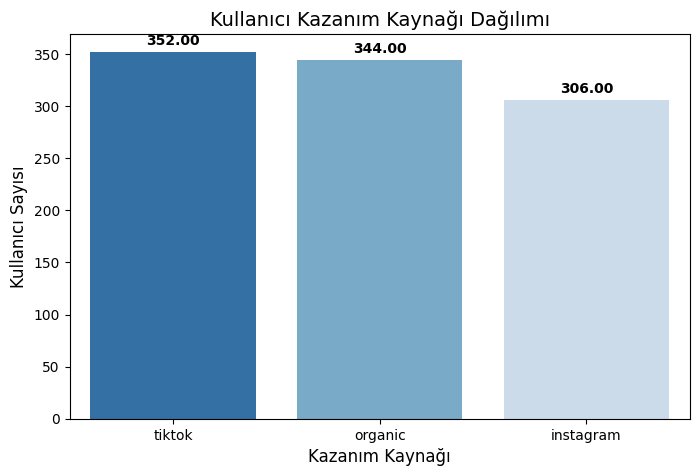

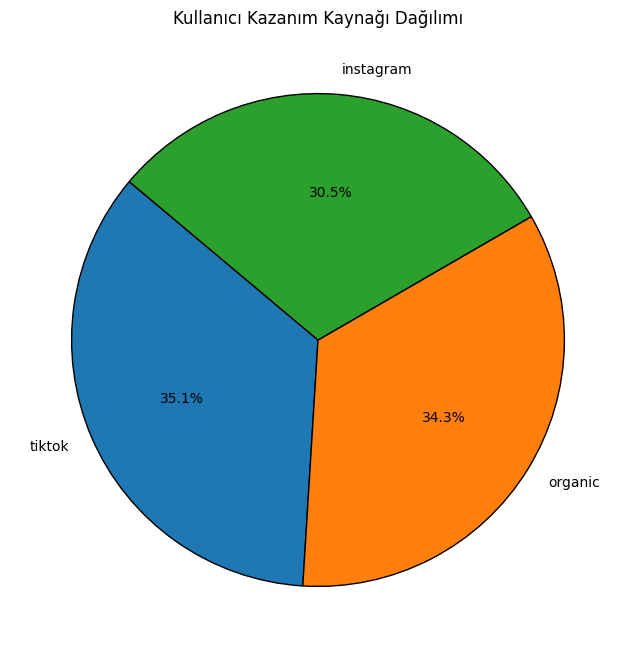

In [39]:
kazanım_sayımı = users_df["attribution_source"].value_counts()

draw_bar_plot(
    x=kazanım_sayımı.index.tolist(),
    y=kazanım_sayımı.values.tolist(),
    title="Kullanıcı Kazanım Kaynağı Dağılımı",
    xlabel="Kazanım Kaynağı",
    ylabel="Kullanıcı Sayısı"
)

draw_pie_chart(
    x=kazanım_sayımı.values.tolist(),
    y=kazanım_sayımı.index.tolist(),
    startangle=140,
    title="Kullanıcı Kazanım Kaynağı Dağılımı"
)


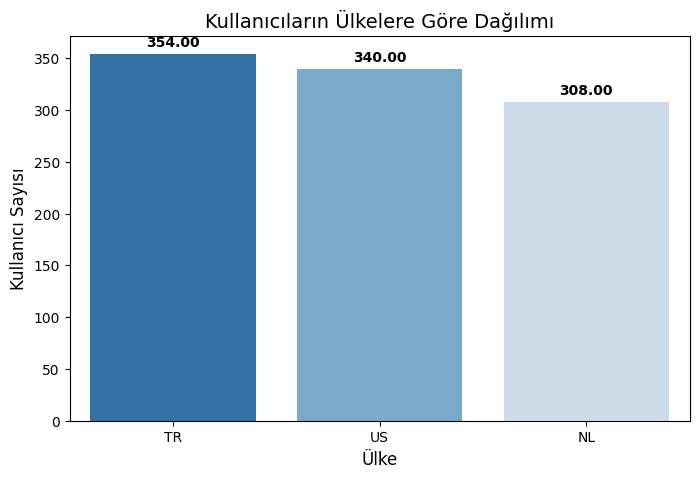

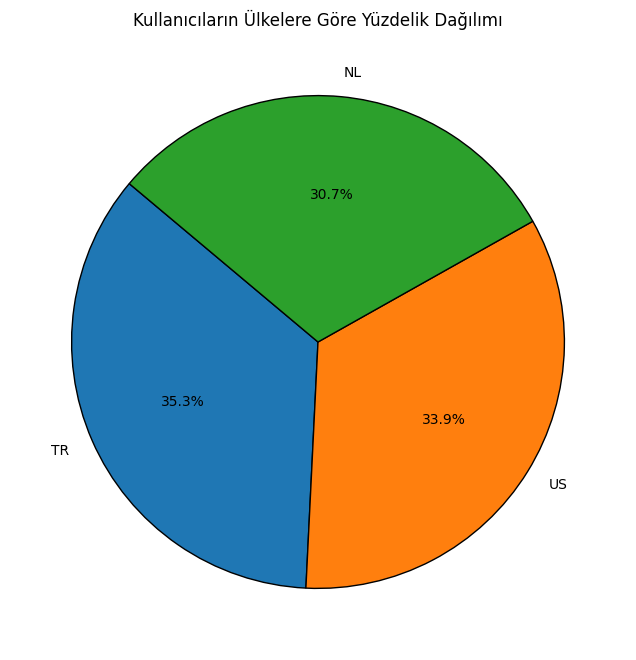

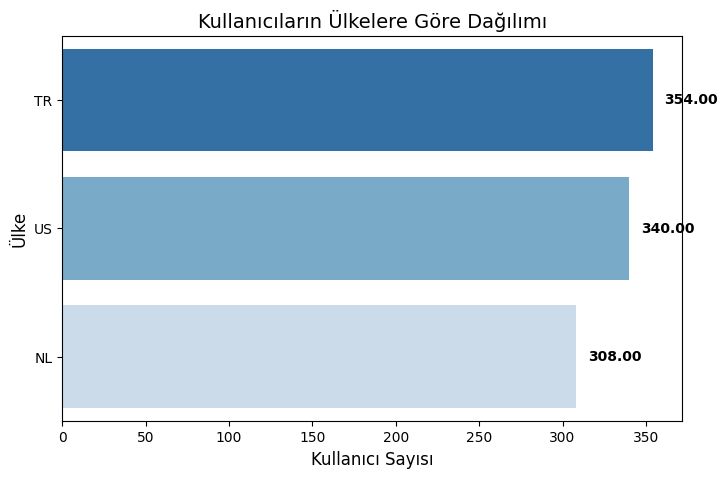

In [40]:
ulke_sayimi = users_df["country"].value_counts()

draw_bar_plot(
    x=ulke_sayimi.index.tolist(),
    y=ulke_sayimi.values.tolist(),
    title="Kullanıcıların Ülkelere Göre Dağılımı",
    xlabel="Ülke",
    ylabel="Kullanıcı Sayısı"
)

draw_pie_chart(
    x=ulke_sayimi.values.tolist(),
    y=ulke_sayimi.index.tolist(),
    startangle=140,
    title="Kullanıcıların Ülkelere Göre Yüzdelik Dağılımı"
)


draw_horizontal_bar_plot(
    x=ulke_sayimi.index.tolist(),
    y=ulke_sayimi.values.tolist(),
    title="Kullanıcıların Ülkelere Göre Dağılımı",
    xlabel="Kullanıcı Sayısı",
    ylabel="Ülke"
)


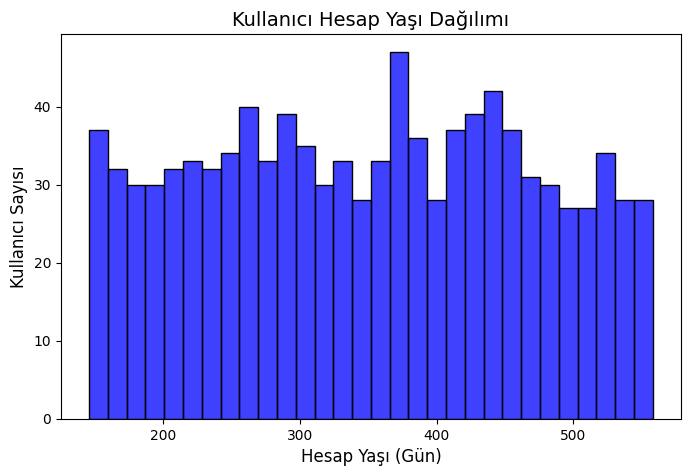

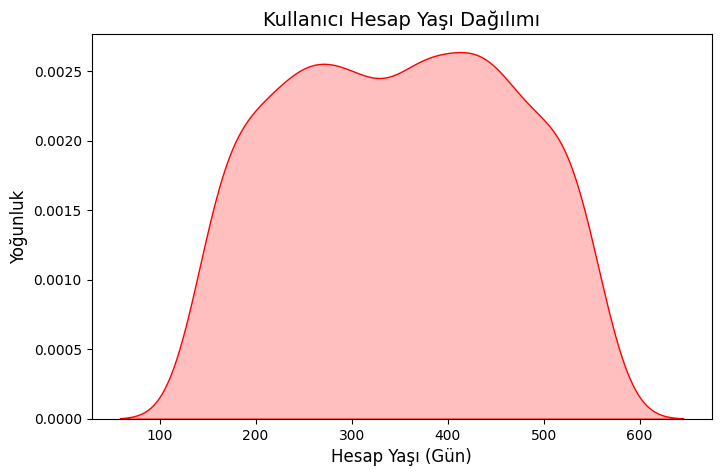

In [34]:
users_df["created_at"] = pd.to_datetime(users_df["created_at"])

current_date = events_df["created_at"].max()
current_date = pd.to_datetime(current_date)

users_df["account_age_days"] = (current_date - users_df["created_at"]).dt.days

plt.figure(figsize=(8, 5))
sns.histplot(users_df["account_age_days"], bins=30, kde=False, color="blue")

plt.title("Kullanıcı Hesap Yaşı Dağılımı", fontsize=14)
plt.xlabel("Hesap Yaşı (Gün)", fontsize=12)
plt.ylabel("Kullanıcı Sayısı", fontsize=12)

plt.show()

plt.figure(figsize=(8, 5))
sns.kdeplot(users_df["account_age_days"], fill=True, color="red")

plt.title("Kullanıcı Hesap Yaşı Dağılımı", fontsize=14)
plt.xlabel("Hesap Yaşı (Gün)", fontsize=12)
plt.ylabel("Yoğunluk", fontsize=12)

plt.show()


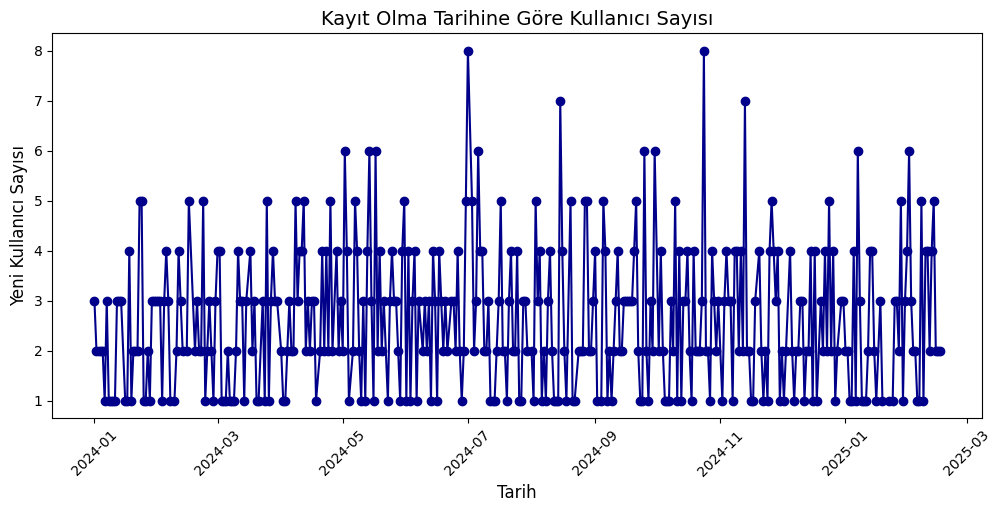

In [48]:
users_df["created_at"] = pd.to_datetime(users_df["created_at"])

user_registration_trend = users_df["created_at"].dt.date.value_counts().sort_index()

draw_time_series(
    x=user_registration_trend,
    title="Kayıt Olma Tarihine Göre Kullanıcı Sayısı",
    xlabel="Tarih",
    ylabel="Yeni Kullanıcı Sayısı"
)


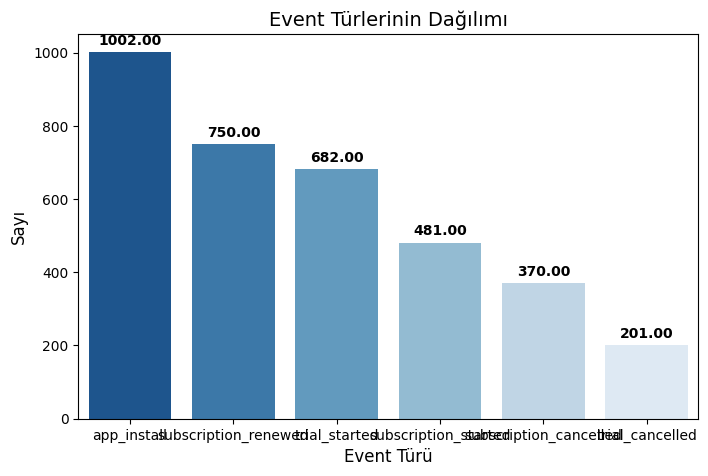

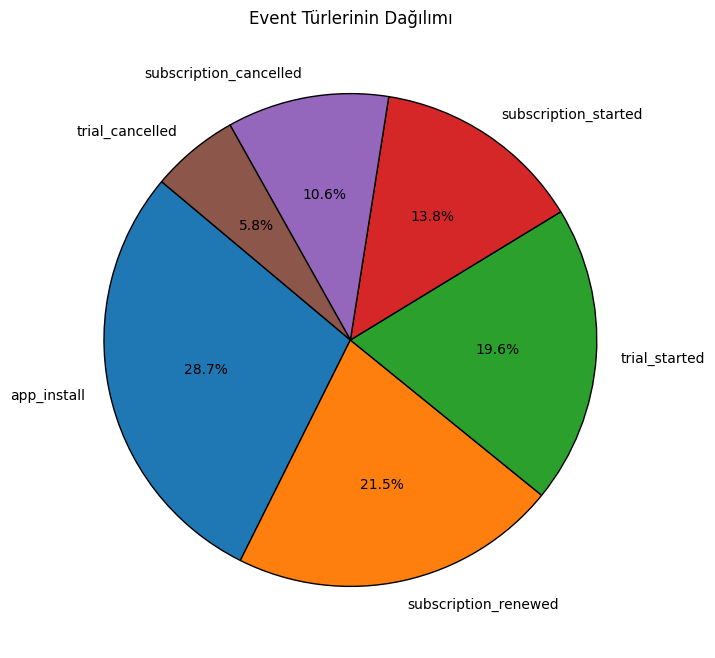

In [16]:
event_sayimi = events_df["event_name"].value_counts()

draw_bar_plot(
    x=event_sayimi.index.tolist(),
    y=event_sayimi.values.tolist(),
    title="Event Türlerinin Dağılımı",
    xlabel="Event Türü",
    ylabel="Sayı"
)

draw_pie_chart(
    x=event_sayimi.values.tolist(),
    y=event_sayimi.index.tolist(),
    startangle=140,
    title="Event Türlerinin Dağılımı"
)


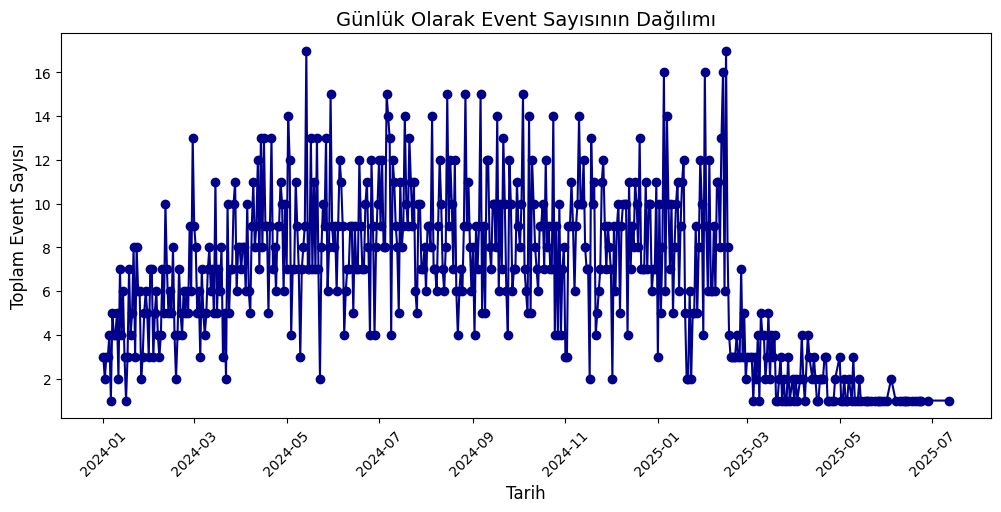

In [49]:
user_events_df["created_at"] = pd.to_datetime(user_events_df["created_at"])

daily_events = user_events_df["created_at"].dt.date.value_counts().sort_index()

draw_time_series(
    x=daily_events,
    title="Günlük Olarak Event Sayısının Dağılımı",
    xlabel="Tarih",
    ylabel="Toplam Event Sayısı"
)


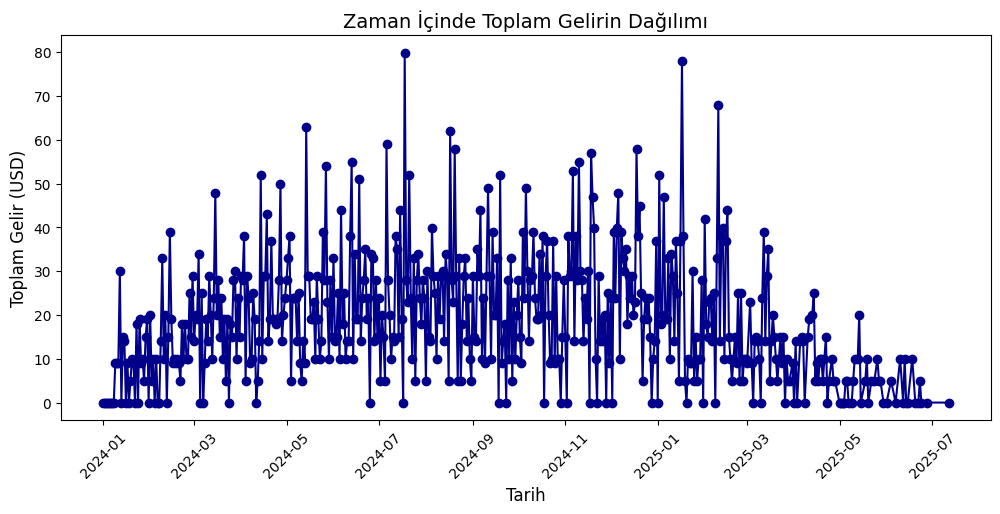

In [52]:
user_events_df["amount_usd"] = pd.to_numeric(user_events_df["amount_usd"], errors="coerce")

daily_revenue = user_events_df.groupby(user_events_df["created_at"].dt.date)["amount_usd"].sum()

draw_time_series(
    x=daily_revenue,
    title="Zaman İçinde Toplam Gelirin Dağılımı",
    xlabel="Tarih",
    ylabel="Toplam Gelir (USD)"
)


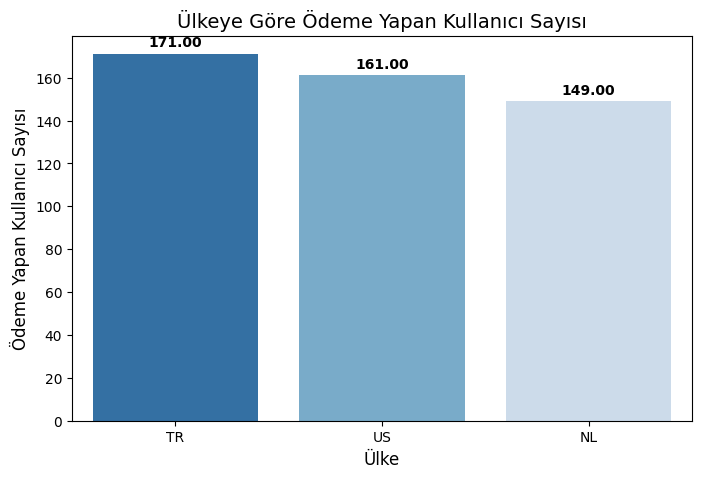

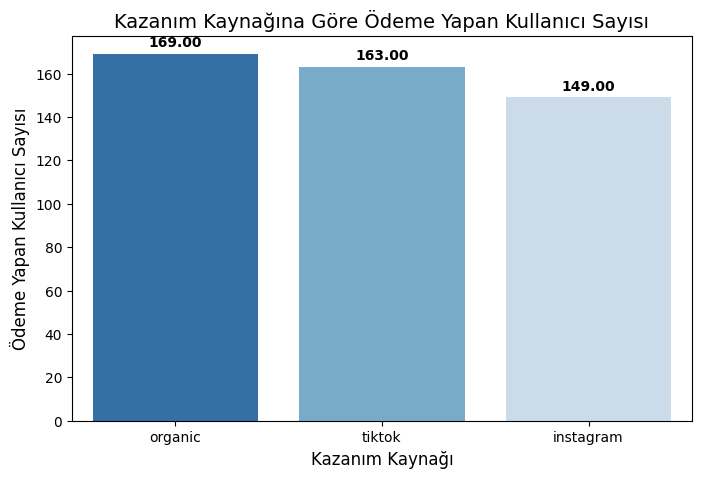

In [53]:
paying_users = user_events_df[user_events_df["amount_usd"] > 0]["user_id"].unique()

paying_users_df = users_df[users_df["id"].isin(paying_users)]

paying_users_by_country = paying_users_df["country"].value_counts()

draw_bar_plot(
    x=paying_users_by_country.index.tolist(),
    y=paying_users_by_country.values.tolist(),
    title="Ülkeye Göre Ödeme Yapan Kullanıcı Sayısı",
    xlabel="Ülke",
    ylabel="Ödeme Yapan Kullanıcı Sayısı"
)

paying_users_by_source = paying_users_df["attribution_source"].value_counts()

draw_bar_plot(
    x=paying_users_by_source.index.tolist(),
    y=paying_users_by_source.values.tolist(),
    title="Kazanım Kaynağına Göre Ödeme Yapan Kullanıcı Sayısı",
    xlabel="Kazanım Kaynağı",
    ylabel="Ödeme Yapan Kullanıcı Sayısı"
)


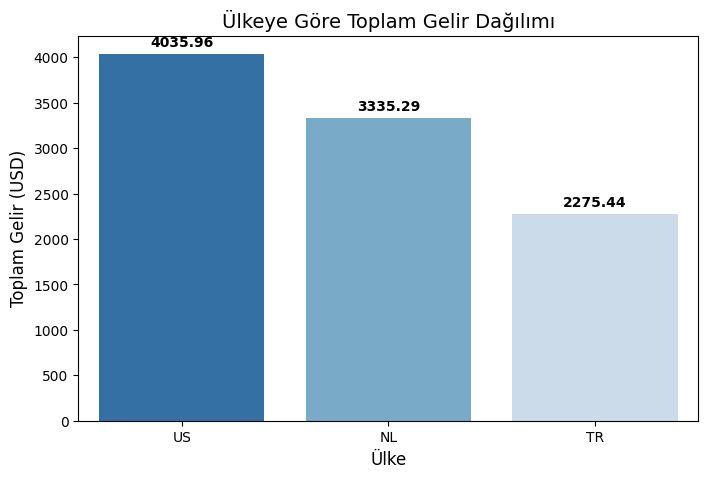

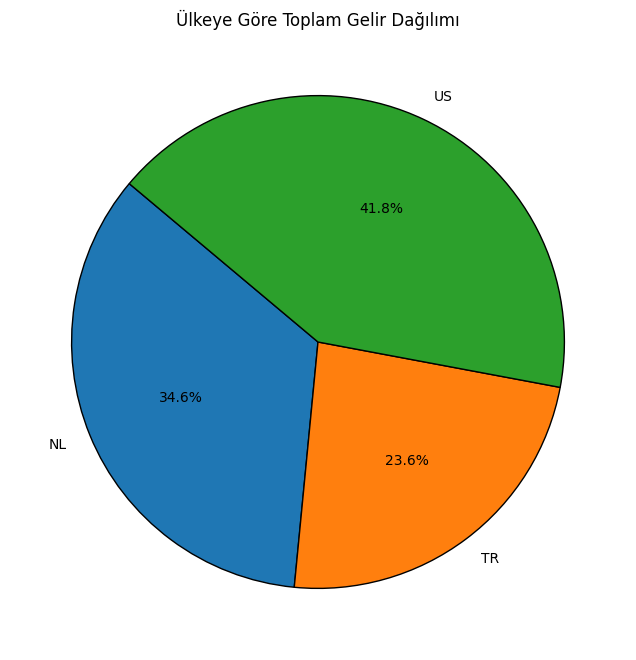

In [18]:
paid_events = events_df[events_df["amount_usd"] > 0]

revenue_by_country = paid_events.merge(users_df[["id", "country"]], left_on="user_id", right_on="id")

total_revenue_per_country = revenue_by_country.groupby("country")["amount_usd"].sum().reset_index()

draw_bar_plot(
    x=total_revenue_per_country["country"].tolist(),
    y=total_revenue_per_country["amount_usd"].tolist(),
    title="Ülkeye Göre Toplam Gelir Dağılımı",
    xlabel="Ülke",
    ylabel="Toplam Gelir (USD)"
)

draw_pie_chart(
    x=total_revenue_per_country["amount_usd"].tolist(),
    y=total_revenue_per_country["country"].tolist(),
    startangle=140,
    title="Ülkeye Göre Toplam Gelir Dağılımı"
)


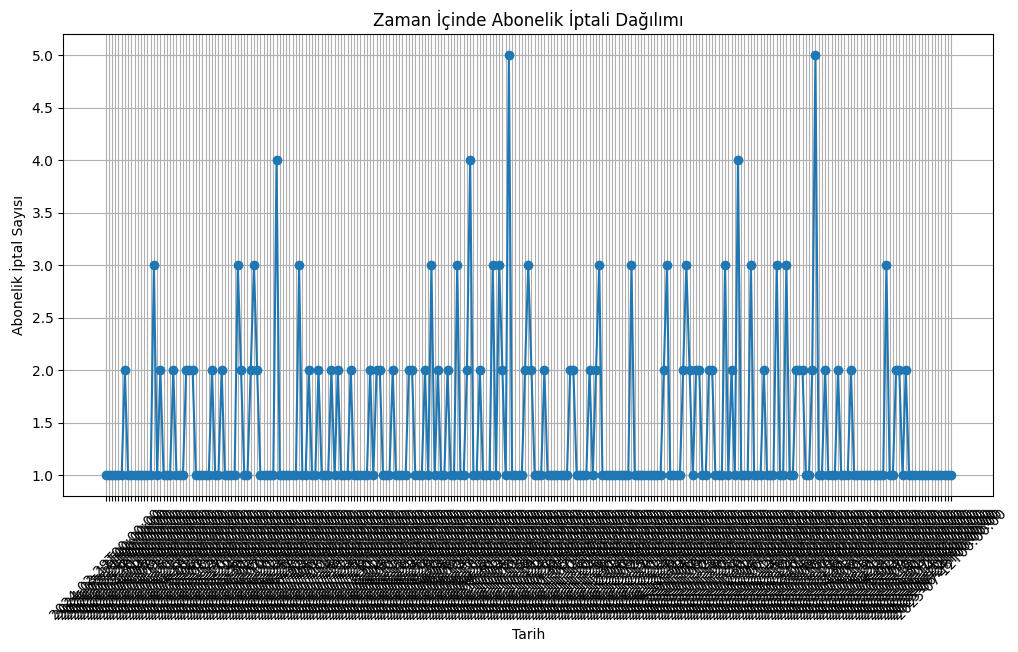

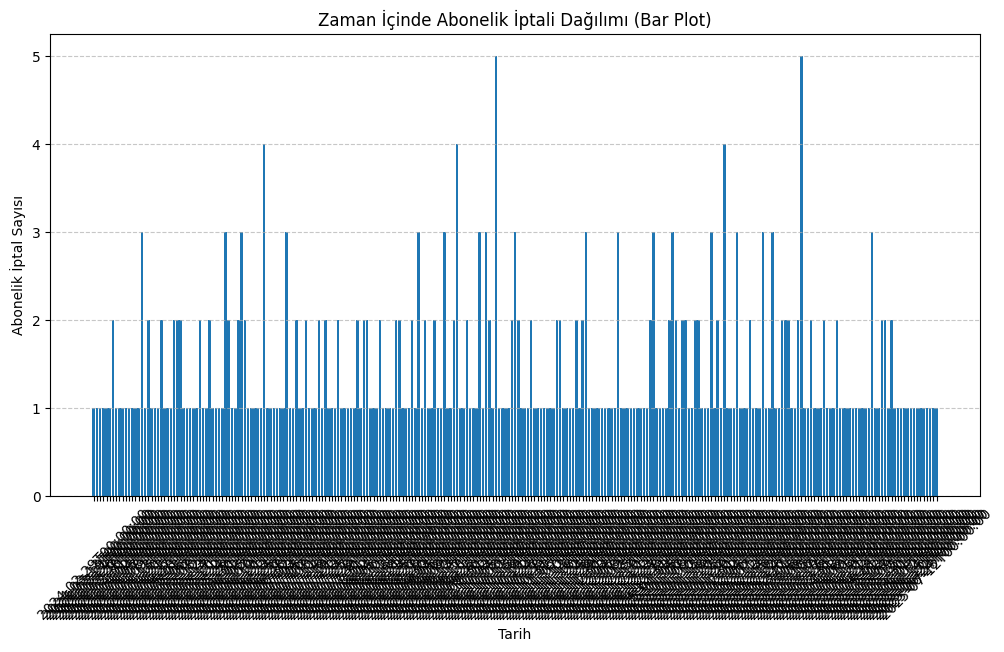

In [21]:
subscription_cancellations = events_df[events_df["event_name"] == "subscription_cancelled"]

cancellations_by_date = subscription_cancellations.groupby("created_at").size().reset_index(name="cancellations")

plt.figure(figsize=(12, 6))
plt.plot(cancellations_by_date["created_at"], cancellations_by_date["cancellations"], marker="o", linestyle="-")
plt.xlabel("Tarih")
plt.ylabel("Abonelik İptal Sayısı")
plt.title("Zaman İçinde Abonelik İptali Dağılımı")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Bar Plot ile görselleştirme
plt.figure(figsize=(12, 6))
plt.bar(cancellations_by_date["created_at"], cancellations_by_date["cancellations"])
plt.xlabel("Tarih")
plt.ylabel("Abonelik İptal Sayısı")
plt.title("Zaman İçinde Abonelik İptali Dağılımı (Bar Plot)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


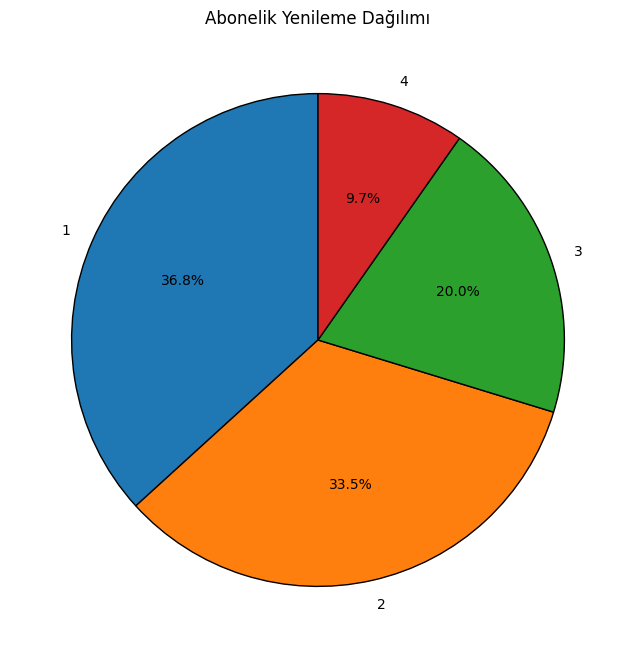

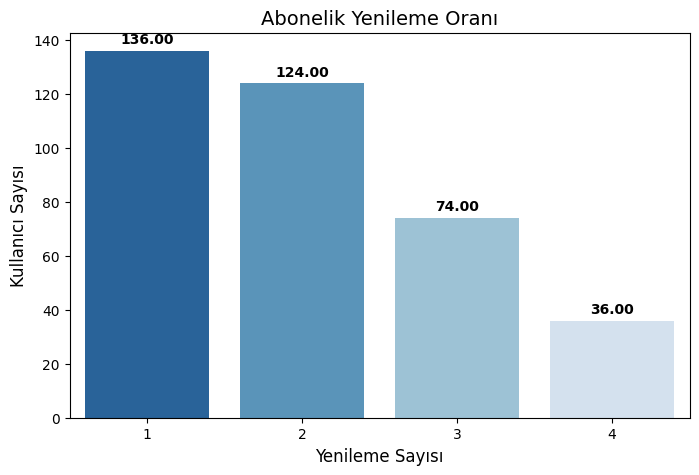

In [55]:
subscription_renewals = user_events_df[user_events_df["event_name"] == "subscription_renewed"]

renewal_counts = subscription_renewals["user_id"].value_counts().reset_index()
renewal_counts.columns = ["user_id", "renewal_count"]

renewal_distribution = renewal_counts["renewal_count"].value_counts().reset_index()
renewal_distribution.columns = ["renewal_count", "user_count"]
renewal_distribution = renewal_distribution.sort_values(by="renewal_count")

draw_pie_chart(
    x=renewal_distribution["user_count"].tolist(),
    y=renewal_distribution["renewal_count"].astype(str).tolist(),
    startangle=90,
    title="Abonelik Yenileme Dağılımı"
)

draw_bar_plot(
    x=renewal_distribution["renewal_count"].astype(str).tolist(),
    y=renewal_distribution["user_count"].tolist(),
    title="Abonelik Yenileme Oranı",
    xlabel="Yenileme Sayısı",
    ylabel="Kullanıcı Sayısı"
)


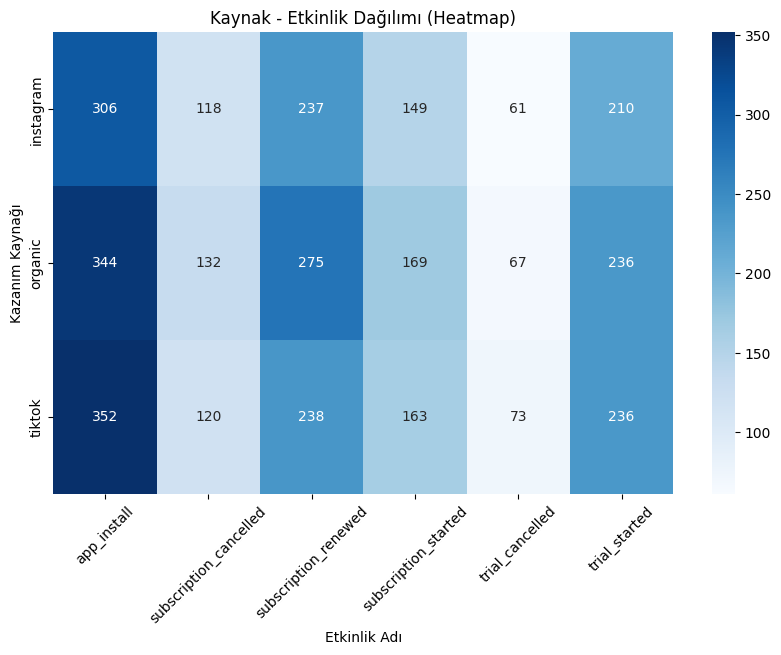

In [56]:
merged_df = pd.merge(user_events_df, users_df, left_on="user_id", right_on="id", suffixes=("_event", "_user"))

pivot_data = merged_df.groupby(["attribution_source", "event_name"])["id_event"].count().reset_index()
pivot_data.rename(columns={"id_event": "count"}, inplace=True)

pivot_table = pivot_data.pivot(index="attribution_source", columns="event_name", values="count").fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="Blues")
plt.title("Kaynak - Etkinlik Dağılımı (Heatmap)")
plt.xlabel("Etkinlik Adı")
plt.ylabel("Kazanım Kaynağı")
plt.xticks(rotation=45)
plt.show()


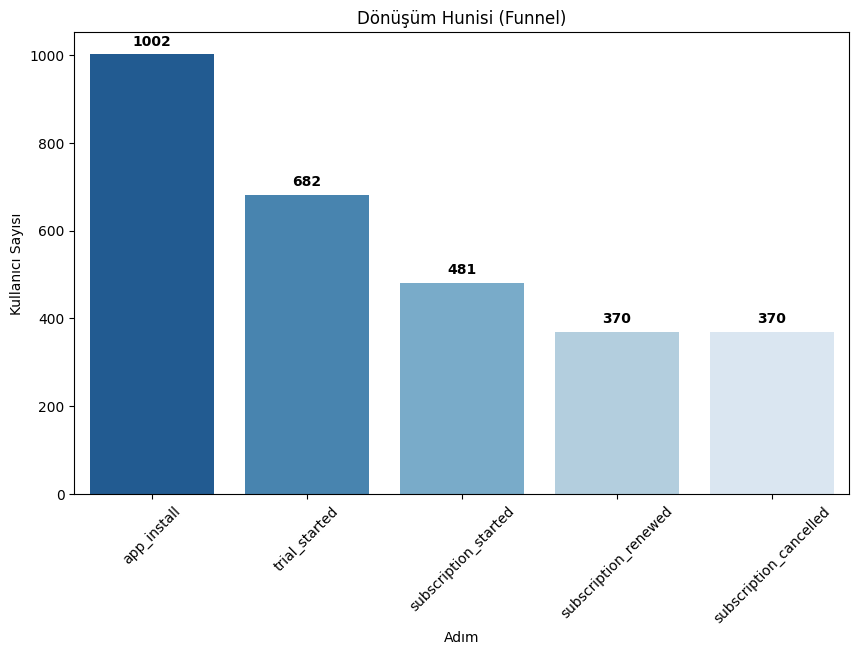

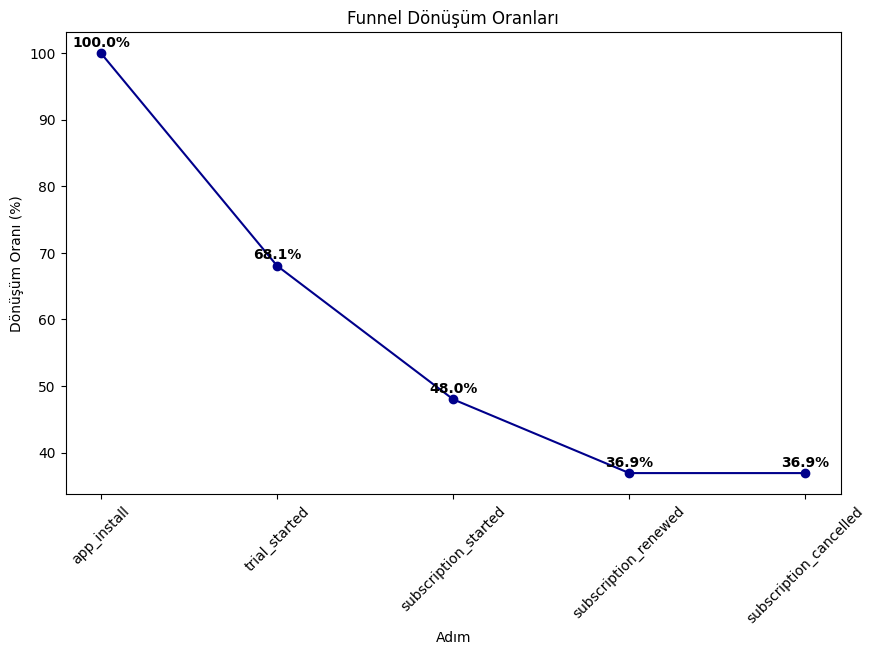

In [59]:
funnel_steps = [
    "app_install",
    "trial_started",
    "subscription_started",
    "subscription_renewed",
    "subscription_cancelled"
]

funnel_data = {step: user_events_df[user_events_df["event_name"] == step]["user_id"].nunique() for step in funnel_steps}

funnel_df = pd.DataFrame(list(funnel_data.items()), columns=["Step", "User Count"])

funnel_df["Conversion Rate (%)"] = (funnel_df["User Count"] / funnel_df["User Count"].iloc[0]) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=funnel_df["Step"], y=funnel_df["User Count"], palette="Blues_r")

plt.title("Dönüşüm Hunisi (Funnel)")
plt.xlabel("Adım")
plt.ylabel("Kullanıcı Sayısı")
plt.xticks(rotation=45)

for index, value in enumerate(funnel_df["User Count"]):
    plt.text(index, value + max(funnel_df["User Count"]) * 0.02, str(value), ha='center', fontsize=10, fontweight='bold')

plt.show()

plt.figure(figsize=(10, 6))
plt.plot(funnel_df["Step"], funnel_df["Conversion Rate (%)"], marker="o", linestyle="-", color="darkblue")

plt.title("Funnel Dönüşüm Oranları")
plt.xlabel("Adım")
plt.ylabel("Dönüşüm Oranı (%)")
plt.xticks(rotation=45)

for index, value in enumerate(funnel_df["Conversion Rate (%)"]):
    plt.text(index, value + 1, f"{value:.1f}%", ha='center', fontsize=10, fontweight='bold')

plt.show()



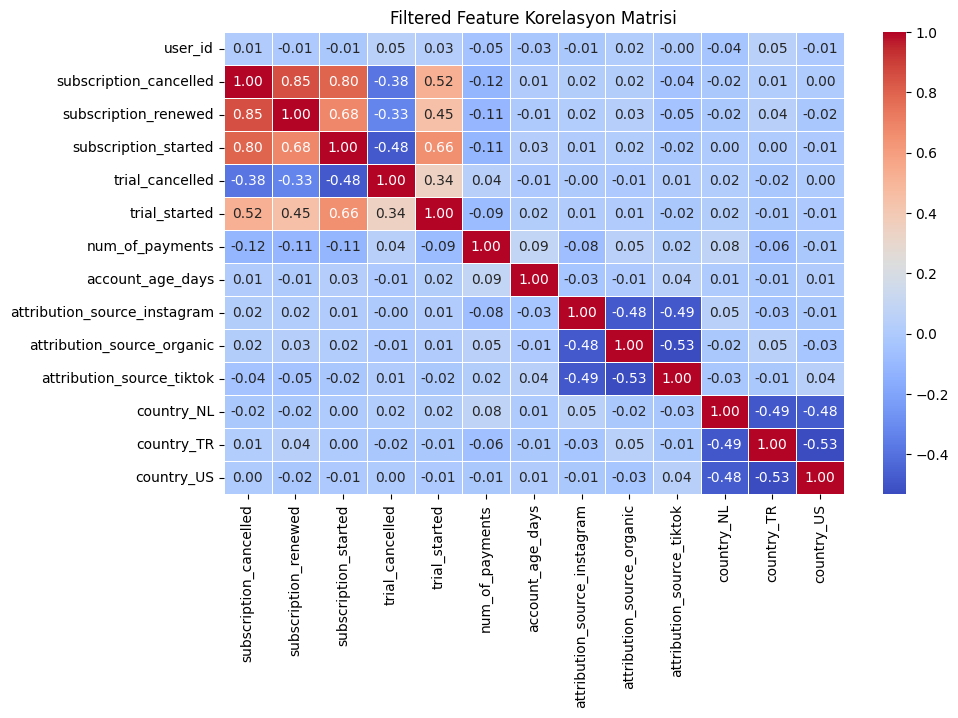

In [3]:
db_path = "papcorns.sqlite"
conn = sqlite3.connect(db_path)

users_df = pd.read_sql_query("SELECT * FROM users;", conn)
events_df = pd.read_sql_query("SELECT * FROM user_events;", conn)

event_features = events_df.pivot_table(index="user_id", columns="event_name", aggfunc="size", fill_value=0).reset_index()

users_df["created_at"] = pd.to_datetime(users_df["created_at"])
current_date = pd.to_datetime(events_df["created_at"]).max()  # En son event tarihi
users_df["account_age_days"] = (current_date - users_df["created_at"]).dt.days

user_demographics = users_df[["id", "attribution_source", "country", "account_age_days"]]
user_demographics = pd.get_dummies(user_demographics, columns=["attribution_source", "country"], drop_first=False)

payment_counts = events_df[events_df["event_name"] == "subscription_renewed"].groupby("user_id").size().reset_index(name="num_of_payments")

features_df = users_df[["id"]].merge(event_features, left_on="id", right_on="user_id", how="left") \
    .merge(payment_counts, on="user_id", how="left") \
    .merge(user_demographics, left_on="id", right_on="id", how="left")

features_df = features_df.fillna(0)

features_df.set_index("id", inplace=True)

filtered_df = features_df[features_df["trial_started"] == 1]
filtered_df = filtered_df[~((filtered_df["trial_started"] == 1) & (filtered_df["trial_cancelled"] == 1))]
filtered_df = filtered_df[filtered_df["subscription_started"] != 0]


all_features = features_df.copy()

correlation_matrix = all_features.corr()

filtered_correlation_matrix = correlation_matrix.drop(index=["app_install"], errors="ignore")
filtered_correlation_matrix = filtered_correlation_matrix.drop(columns=["app_install", "user_id", ], errors="ignore")

target_correlation_filtered = filtered_correlation_matrix["num_of_payments"].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Filtered Feature Korelasyon Matrisi")
plt.show()


In [4]:
selected_features_denemelik = [
    "subscription_cancelled", "subscription_renewed", "subscription_started",
    "trial_cancelled", "trial_started"
]


In [7]:
selected_features_with_target = selected_features_denemelik + ["num_of_payments"]
filtered_correlation = features_df[selected_features_with_target].corr()["num_of_payments"].sort_values(ascending=False)

filtered_correlation_df = filtered_correlation.to_frame().reset_index()
filtered_correlation_df.columns = ["Feature", "num_of_payments ile korelasyon"]

print(filtered_correlation_df)


                  Feature  num_of_payments ile korelasyon
0    subscription_renewed                        1.000000
1         num_of_payments                        1.000000
2  subscription_cancelled                        0.854703
3    subscription_started                        0.680619
4           trial_started                        0.447961
5         trial_cancelled                       -0.327596
